In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "pioneer"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipUrls = []

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["url"] not in skipUrls
        if x["date"] >= startDate
    ]

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

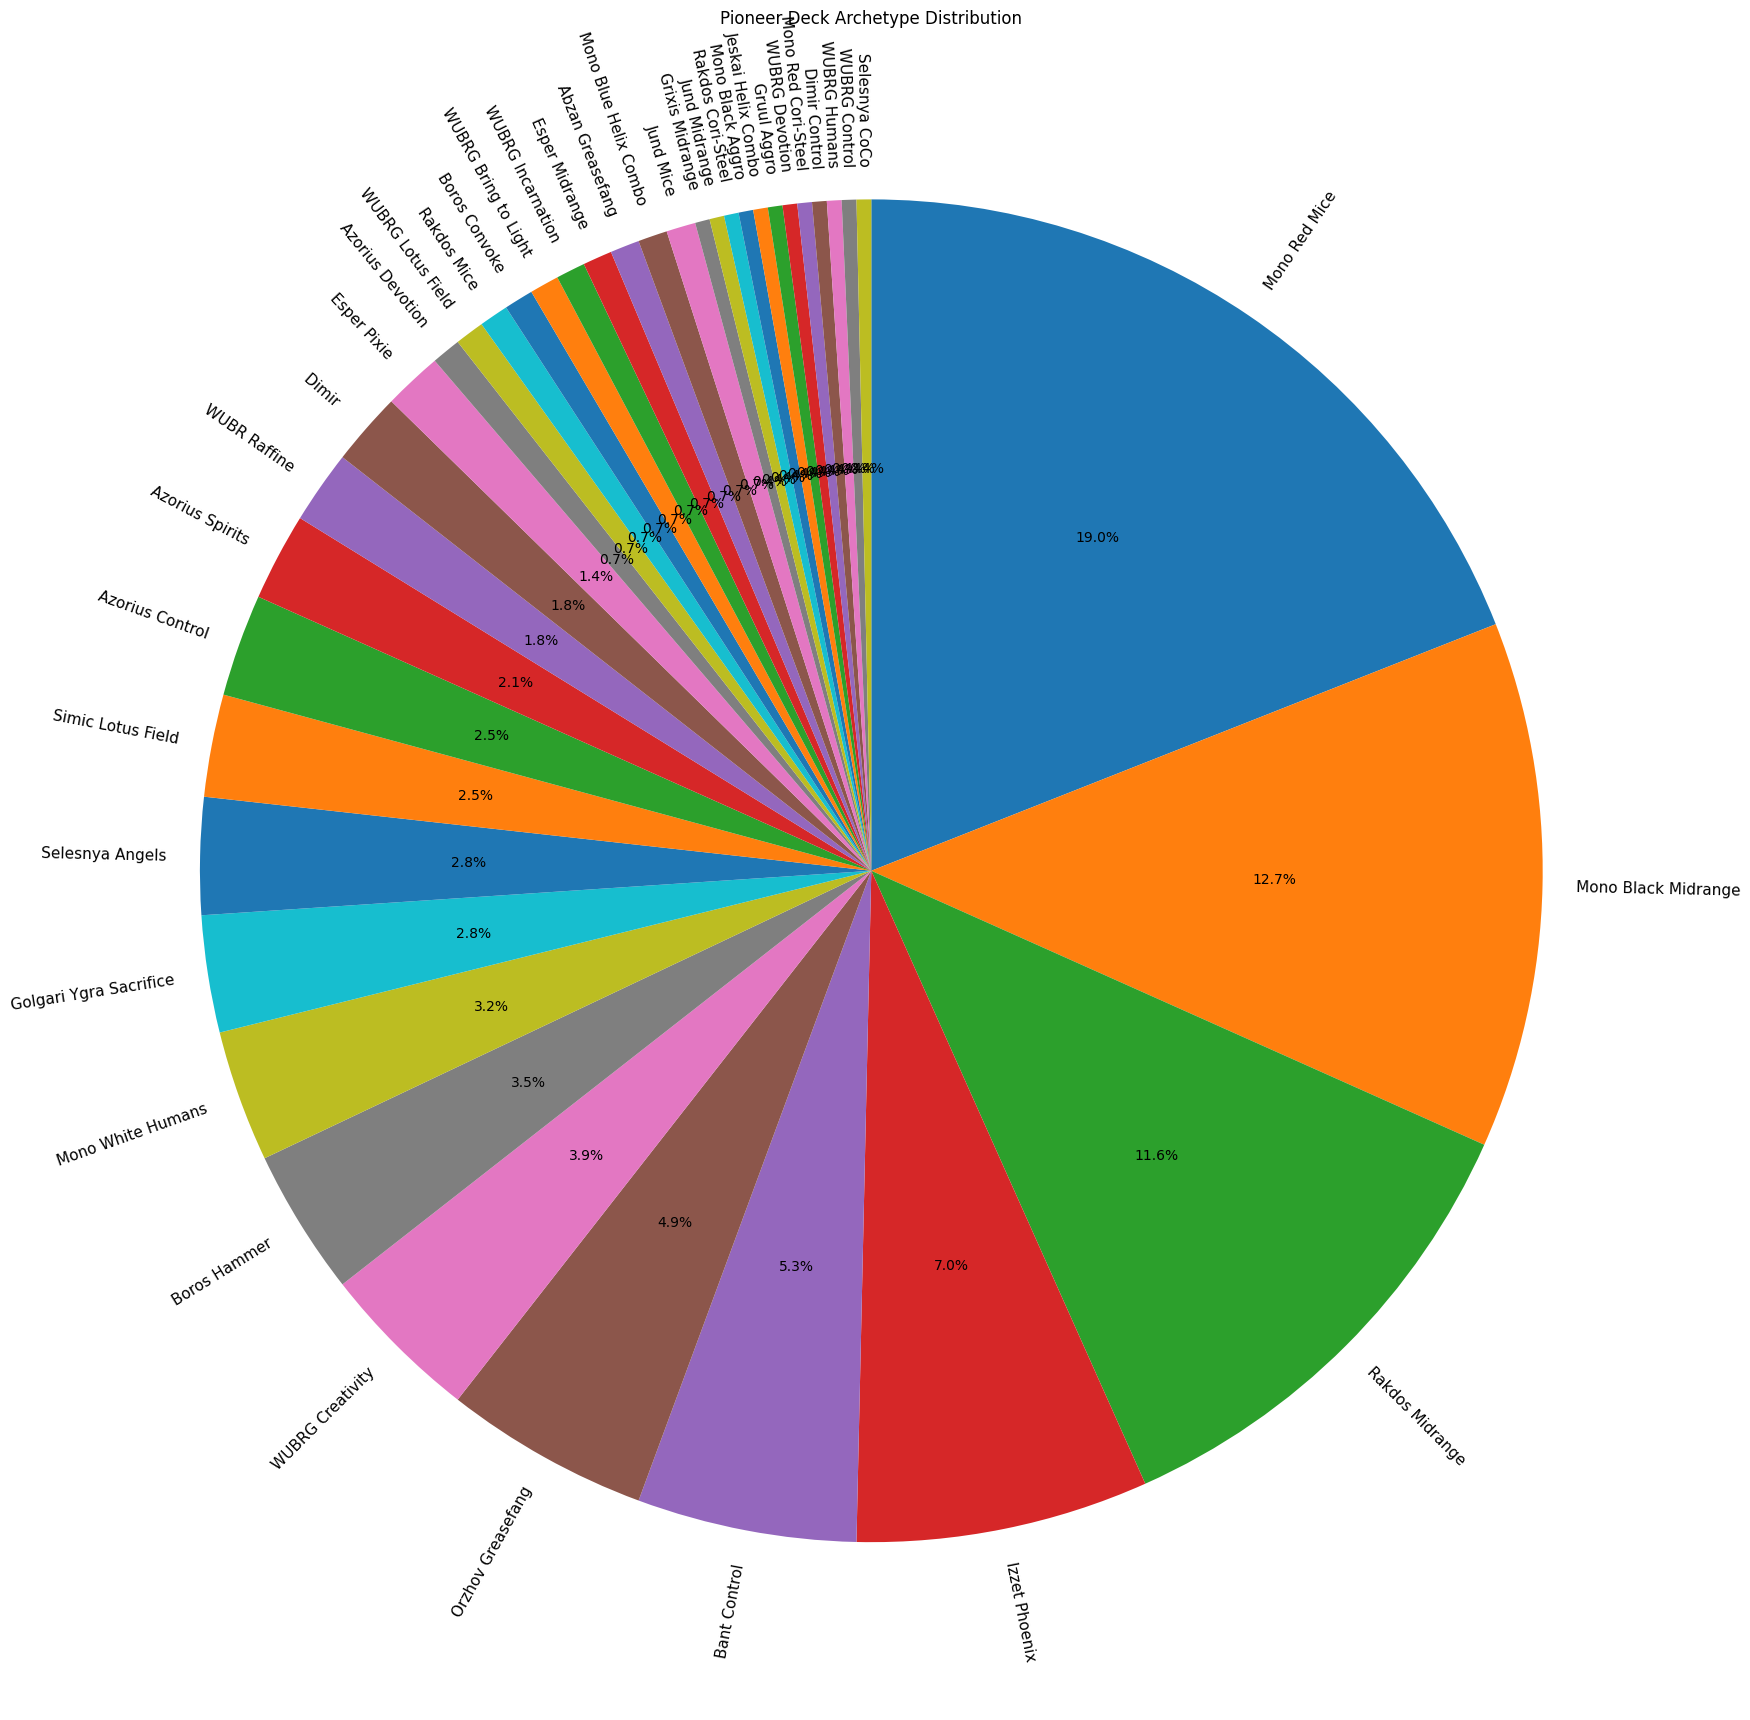

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

7 deck(s) without any of the specified key cards
Mono Black Aggro


Main/Side  \
Deck URL                                          Deck                
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Side   
                                                  Deck 28      Main   
                                                  Deck 28      Side   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Side   
                                                  Deck 28      Side   
                                                  Deck 28      Side   
                                                  Deck 28      Main   
                                                  Deck 28      Side   

                                                                           Card Name  \
Deck URL                                          Deck                                 
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 28             Dark Confidant   
                                                  Deck 28         Cecil, Dark Knight   
                                                  Deck 28      Gix, Yawgmoth Praetor   
                                                  Deck 28                 Fatal Push   
                                                  Deck 28          Go for the Throat   
                                                  Deck 28            Deep-Cavern Bat   
                                                  Deck 28               Thoughtseize   
                                                  Deck 28               Unholy Annex   
                                                  Deck 28                  Mox Amber   
                                                  Deck 28                     Duress   
                                                  Deck 28  Tinybones, the Pickpocket   
                                                  Deck 28          Gifted Aetherborn   
                                                  Deck 28          Unlicensed Hearse   
                                                  Deck 28          Withering Torment   
                                                  Deck 28          Grafdigger's Cage   
                                                  Deck 28          Smuggler's Copter   
                                                  Deck 28          Gifted Aetherborn   

                                                           Quantity  \
Deck URL                                          Deck                
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         4   
                                                  Deck 28         3   
                                         

In [4]:
# DataFrame showing the most common non-land cards in the format.
onOff = "off"
if onOff == "on":
    cardDf = (
        pd.concat([x.deckDf for x in deckList])
        .reset_index()
        .groupby("Card Name")["Quantity"]
        .sum()
        .reset_index()
    )
    cardDf = cardDf.sort_values(by="Quantity", ascending=False)
    cardDf = identifyDeck.enrichDataFrame(cardDf, oracle.expandedClean())
    cardDf[~cardDf["type_line"].str.contains("Land")]
    cardDf["Quantity"] = round(cardDf["Quantity"] / len(deckList), 2)
    cardDf

In [5]:
filteredDecks = [x.deckId for x in deckList if x.deckName == "Izzet Phoenix"]

In [6]:
includedCardList = ["Cori-Steel Cutter"]
excludedCardList = ["Cloud, Midgar Mercenary", "Arclight Phoenix"]
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

Card Name
Cori-Steel Cutter                 4.00
Snow-Covered Mountain             2.50
Experimental Synthesizer          2.00
Copperline Gorge                  2.00
Emberheart Challenger             2.00
Monstrous Rage                    2.00
Soul-Scar Mage                    2.00
Thornspire Verge                  2.00
Stomping Ground                   2.00
Monastery Swiftspear              2.00
Questing Druid                    2.00
Kumano Faces Kakkazan             2.00
Burst Lightning                   2.00
Weapons Manufacturing             2.00
Shrapnel Blast                    1.75
Light Up the Stage                1.50
Reckless Rage                     1.50
Legion Extruder                   1.50
Mountain                          1.25
Ramunap Ruins                     1.25
Den of the Bugbear                1.25
Sulfurous Springs                 1.00
Deadly Dispute                    1.00
Darksteel Citadel                 1.00
Clockwork Percussionist           1.00
Blackcleave Cli

In [7]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Mountain                  816
Swamp                     709
Mutavault                 489
Fatal Push                448
Thoughtseize              422
                         ... 
Languish                    1
Lair of the Hydra           1
Lively Dirge                1
Ashiok, Nightmare Muse      1
Zur, Eternal Schemer        1
Name: Quantity, Length: 475, dtype: int64

In [8]:
Queries.avgArchetype(deckList, "Izzet Phoenix", "Main")

Main/Side  \
Deck URL                                          Deck               
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 5      Main   
                                                  Deck 5      Main   
                                                  Deck 5      Main   
                                                  Deck 5      Main   
                                                  Deck 5      Main   
...                                                            ...   
/decklist/pioneer-challenge-32-2025-09-0112812817 Deck 6      Main   
                                                  Deck 6      Main   
                                                  Deck 6      Main   
                                                  Deck 6      Main   
                                                  Deck 6      Main   

                                                                       Card Name  \
Deck URL                                          Deck                             
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 5        Arclight Phoenix   
                                                  Deck 5         Artist's Talent   
                                                  Deck 5                Consider   
                                                  Deck 5       Cori-Steel Cutter   
                                                  Deck 5      Riverglide Pathway   
...                                                                          ...   
/decklist/pioneer-challenge-32-2025-09-0112812817 Deck 6  Proft's Eidetic Memory   
                                                  Deck 6   Otawara, Soaring City   
                                                  Deck 6       Spikefield Hazard   
                                                  Deck 6         Torch the Tower   
                                                  Deck 6       Stormcarved Coast   

                                                          Quantity mana_cost  \
Deck URL                                          Deck                         
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 5         4    {3}{R}   
                                                  Deck 5         4    {1}{R}   
                                                  Deck 5         4       {U}   
                                                  Deck 5         4    {1}{R}   
                                                  Deck 5         4             
...                                                            ...       ...   
/decklist/pioneer-challenge-32-2025-09-0112812817 Deck 6         1    {1}{U}   
                                                  Deck 6         1             
                                                  Deck 6         1       {R}   
                                                  Deck 6         1       {R}   
                                                  Deck 6         1             

                                                                      type_line  \
Deck URL                                          Deck                            
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 5     Creature — Phoenix   
                                                  Deck 5    Enchantment — Class   
                                                  Deck 5                Instant   
                                                  Deck 5   Artifact — Equipment   
                                                  Deck 5                   Land   
...                                                                         ...   
/decklist/pioneer-challenge-32-2025-09-0112812817 Deck 6  Legendary Enchantment   
                                                  Deck 6         Legendary Land   
                                                  Deck 6                Instant   
                                                  Deck 6                Instant   
                